# Complex impedance

In cartesian coordinates impedance of a capacitor/inductor is

$Z=a+jb$

In time domain voltage and current are out of phase.

<img src="current-voltage-capacitor.png" width=400 />

Example: in ideal resistor, there is no reactance

$Z=R=a+j*0$

This cartesian Z can also be expressed in polar form

$Z=r \angle\theta$ where $r=\sqrt{a^2+b^2}$

back to cartesian

$Z=r*cos(\theta) + j*r*sin(\theta)$

There is the Euler's Formula

$e^{j\theta} = cos(\theta)+j*sin(\theta)$

see https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/images/Expo_form_complx_num.pdf

This is the exponential form of a complex number

$Z=r*e^{j\theta}$

$\theta$ (sometimes also denoted $\phi$) is a real number called the argument. The argument is sometimes also known as the phase.

If you know cartesian values $Z=a+jb$, then $\theta=atan(\frac{b}{a})$ some times written as $tan^-1(\frac{b}{a})$

# Measurements

Connect scope probes like this

<img src="scope_fixture.png"/>

# References
http://lampx.tugraz.at/~hadley/semi/ch9/measurements/impedance/impedance.php

http://www.mathforengineers.com/AC-circuits/complex-numbers-in-AC-circuits.html


http://www.pilloud.net/op_web/one_port.pdf


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


m[5]= [ 5.00e+03  9.29e+02  9.28e+02 -2.30e+00]
Phase difference:= -1277.7777777777776
Zload[5]= (0.02711132126296434+4.017503799865084j)
S11[5]= (-0.9861074517659221+0.15949740098262605j)
[5288.48488921 1950.4494239  1000.88466006 2010.36917685  312.7541836
  127.88111773   83.47192153   54.35322346   48.41572112   58.05394393] uH


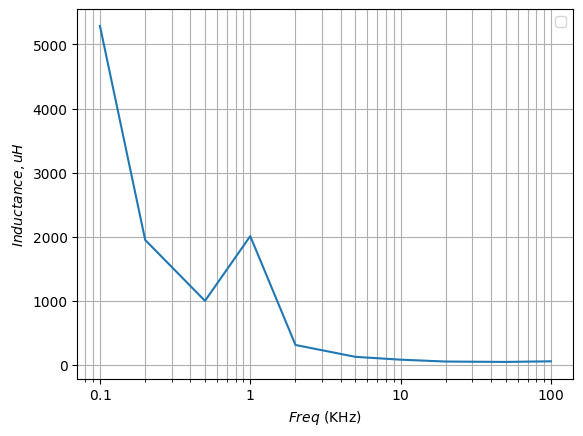

In [108]:
import numpy
import matplotlib.pyplot as plt
import matplotlib.collections as collections
import scipy.interpolate as interpolate

m = numpy.loadtxt("measurements2.csv", delimiter="," )

Rref = 100
Cprobe = 15*1e-12 #15 pF
Rprobe = 1e+7 #10 MOhm
Z0 = 50 + 1j*0;

fr = m[:,0]

yr=1/Rref + 1j*0
yp=1/Rprobe + 1j*2*numpy.pi*fr*Cprobe
#Zresistor = 1/(yr+yp)
Zresistor = Rref + 1j*0

V1=m[:,1]+1j*0
V2=m[:,2]*numpy.cos(m[:,3]*numpy.pi/180) + 1j*m[:,2]*numpy.sin(m[:,3]*numpy.pi/180)
I=V2/Zresistor
Ztotal=V1/I
Zload = Ztotal-Zresistor
L = Zload.imag/(2*numpy.pi*fr)
# print(L)
# L = (Rref)*numpy.tan(-m[:,3]*numpy.pi/180)/(2*numpy.pi*fr)
# print(L)

S11 = (Zload-Z0)/(Zload+Z0)

print("m[5]=", m[5])
print("Phase difference:=", m[5][3]/fr[5]/360*1e9)
print("Zload[5]=", Zload[5] )
print("S11[5]=", S11[5] )
print(L*1e6, "uH")

plt.figure()
plt.plot(fr*1e-3, L*1e6)
plt.ylabel(r"$Inductance, uH $")
plt.xlabel("$Freq$ (KHz)")
plt.grid(True, which="both")
plt.rcParams['axes.formatter.min_exponent'] = 6
plt.xscale('log')
plt.legend()
plt.show()
